In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline
import tensorflow as tf
np.random.seed(12345)


In [ ]:
df_RNN =  pd.read_csv("/content/SCM-2020.csv",index_col='Date',parse_dates=True)
df_RNN.index.freq='MS'
print('Total row count =',len(df_RNN))
print('Types of data =\n',df_RNN.dtypes)

Total row count = 168
Types of data =
 sales    int64
dtype: object


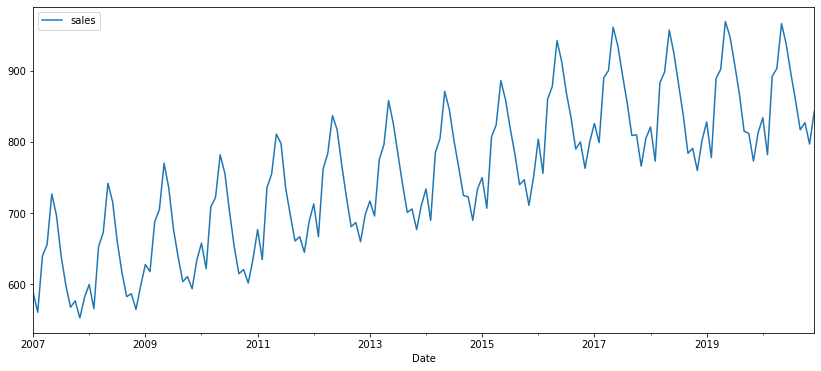

In [ ]:
df_RNN.columns=['sales']
df_RNN.plot(figsize=(14,6))


In [ ]:
print(df_RNN.shape)
train=df_RNN.iloc[:-36]
test=df_RNN.iloc[-36:]
print(train.shape,test.shape)

(168, 1)
(132, 1) (36, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
normalizing = MinMaxScaler()
normalizing.fit(train)
normalized_train = normalizing.transform(train)
normalized_test = normalizing.transform(test)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
tf.random.set_seed(12345)

In [ ]:
n_input = 12
n_features=1
generator = TimeseriesGenerator(normalized_train, normalized_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41,821
Trainable params: 41,821
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(generator,epochs=30)

Epoch 1/30
120/120 [==============================] - 6s 42ms/step - loss: 0.1983
Epoch 2/30
120/120 [==============================] - 5s 42ms/step - loss: 0.1487
Epoch 3/30
120/120 [==============================] - 5s 42ms/step - loss: 0.1249
Epoch 4/30
120/120 [==============================] - 5s 43ms/step - loss: 0.1079
Epoch 5/30
120/120 [==============================] - 5s 41ms/step - loss: 0.0998
Epoch 6/30
120/120 [==============================] - 5s 40ms/step - loss: 0.0839
Epoch 7/30
120/120 [==============================] - 5s 42ms/step - loss: 0.0616
Epoch 8/30
120/120 [==============================] - 5s 44ms/step - loss: 0.0543
Epoch 9/30
120/120 [==============================] - 5s 42ms/step - loss: 0.0524
Epoch 10/30
120/120 [==============================] - 5s 43ms/step - loss: 0.0639
Epoch 11/30
120/120 [==============================] - 5s 44ms/step - loss: 0.0437
Epoch 12/30
120/120 [==============================] - 5s 43ms/step - loss: 0.0513
Epoch 13/30
1

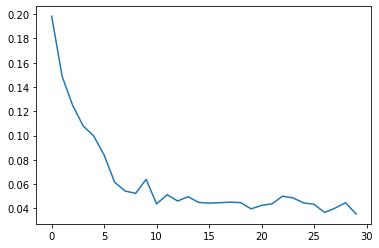

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = normalized_train[-12:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)


array([[0.6346077]], dtype=float32)

In [ ]:
test_predictions = []
first_eval_batch = normalized_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

[array([0.6346077], dtype=float32),
 array([0.65581894], dtype=float32),
 array([0.7713538], dtype=float32),
 array([0.8281606], dtype=float32),
 array([0.8958451], dtype=float32),
 array([0.8754036], dtype=float32),
 array([0.8125886], dtype=float32),
 array([0.730357], dtype=float32),
 array([0.6491154], dtype=float32),
 array([0.6129681], dtype=float32),
 array([0.56256545], dtype=float32),
 array([0.6002996], dtype=float32),
 array([0.6214049], dtype=float32),
 array([0.6612457], dtype=float32),
 array([0.7387137], dtype=float32),
 array([0.79291326], dtype=float32),
 array([0.83536047], dtype=float32),
 array([0.82971746], dtype=float32),
 array([0.78732145], dtype=float32),
 array([0.72184354], dtype=float32),
 array([0.65578437], dtype=float32),
 array([0.61017114], dtype=float32),
 array([0.57672495], dtype=float32),
 array([0.5920381], dtype=float32),
 array([0.613558], dtype=float32),
 array([0.6550636], dtype=float32),
 array([0.71376944], dtype=float32),
 array([0.76071316]

In [ ]:
test.head()

,sales
Date,
2018-01-01,821
2018-02-01,773
2018-03-01,883
2018-04-01,898
2018-05-01,957


In [ ]:
true_predictions = normalizing.inverse_transform(test_predictions)
test['Predictions'] = true_predictions



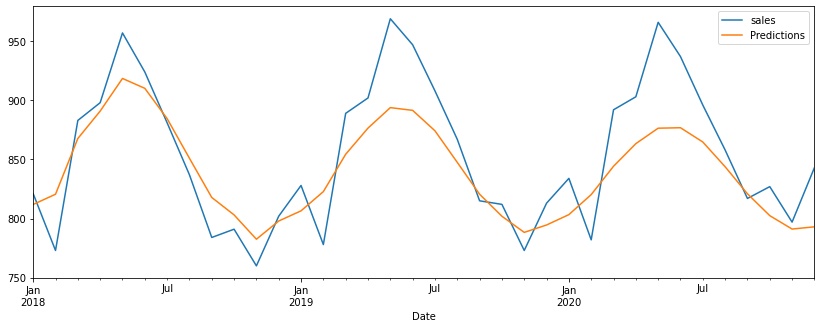

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
RMSE_RNN=sqrt(mean_squared_error(test['sales'],test['Predictions']))
MAE_RNN = mean_absolute_error(test['sales'],test['Predictions'])
print('Mean Squared Error for RNN model is:',RMSE_RNN)
print('Mean Absolute Deviation for RNN model is:',MAE_RNN)


Mean Squared Error for RNN model is: 34.891245664515814
Mean Absolute Deviation for RNN model is: 28.248065458403694


In [ ]:
  y_test, y_pred = np.array(test['sales']), np.array(test['Predictions'])
MAPE_RNN=np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE for RNN Model is:',MAPE_RNN)

MAPE for RNN Model is: 3.2439174409012774


In [ ]:
y_pred

array([811.91993046, 820.5741272 , 867.71234274, 890.88951826,
       918.504807  , 910.16466188, 884.53613758, 850.98565245,
       817.83907652, 803.09097958, 782.52670193, 797.92223549,
       806.53319359, 822.78824711, 854.39518213, 876.50860929,
       893.82707071, 891.52472258, 874.22715092, 847.51216459,
       820.56002235, 801.94982481, 788.30377817, 794.55154276,
       803.3316617 , 820.26596069, 844.21792984, 863.3709693 ,
       876.43434   , 876.82105589, 864.7565999 , 843.83529949,
       820.95841122, 802.46494341, 791.11453295, 793.0084486 ])